# Importing Libraries


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Importing Dataset


In [5]:
dataframe = pd.read_csv('../merged_data.csv')

In [8]:
dataframe

,SMILES,ID,MolWt,LogP,HBD,HBA,RotatableBonds,TPSA,Volume,LipinskiViolations,NumAtoms,Exp. dG,Pred. dG
0,CN1C(=[NH+][C@@](c2cccc(c3cccc(Cl)c3)c2)(C2CCC...,CAT-13f,368.89,2.26,2,2,3,60.30,221.78,0,26,-9.09,-10.24
1,CN1C(=[NH+][C@@](c2cccc(c3cccc(Cl)c3)c2)(C2CC2...,CAT-13d,340.83,1.48,2,2,3,60.30,204.89,0,24,-10.47,-10.50
2,COc1ccc(c2cccc([C@@]3(c4ccccc4)[NH+]=C(N)N(C)C...,CAT-4c,372.45,1.47,2,3,4,69.53,224.20,0,28,-7.85,-7.52
3,CC[C@]1(c2cccc(c3cccc(Cl)c3)c2)[NH+]=C(N)N(C)C1=O,CAT-13b,328.82,1.48,2,2,3,60.30,197.66,0,23,-9.12,-8.92
4,CN1C(=[NH+][C@](c2ccccc2)(c2cccc(c3cnccn3)c2)C...,CAT-4l,344.40,0.25,2,4,3,86.08,207.32,0,26,-9.34,-7.29
...,...,...,...,...,...,...,...,...,...,...,...,...,...
206,c1c(c(ccc1F)Oc1c(=O)n(c2c(c1)cnc(n2)NCC(C)(O)C...,p38a_2y,376.36,2.58,2,7,5,89.27,226.59,0,27,-9.78,-10.60
207,C1COCCC1Nc1ncc2cc(c(=O)n(c2n1)C)Cc1c(cccc1)F,p38a_2i,368.41,2.65,1,6,4,69.04,221.79,0,27,-10.05,-10.22
208,c1c(c(ccc1F)Oc1c(=O)n(c2c(c1)cnc(n2)NC1CCOCC1)...,p38a_2o,480.49,2.50,1,9,7,112.41,289.23,0,33,-10.49,-9.46
209,c1c(c(ccc1F)Oc1c(=O)n(c2c(c1)cnc(n2)N[C@@H]1CC...,p38a_2ff,402.40,3.11,2,7,4,89.27,242.26,0,29,-11.44,-10.79


In [10]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211 entries, 0 to 210
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   SMILES              211 non-null    object 
 1   ID                  211 non-null    object 
 2   MolWt               211 non-null    float64
 3   LogP                211 non-null    float64
 4   HBD                 211 non-null    int64  
 5   HBA                 211 non-null    int64  
 6   RotatableBonds      211 non-null    int64  
 7   TPSA                211 non-null    float64
 8   Volume              211 non-null    float64
 9   LipinskiViolations  211 non-null    int64  
 10  NumAtoms            211 non-null    int64  
 11  Exp. dG             211 non-null    float64
 12  Pred. dG            211 non-null    float64
dtypes: float64(6), int64(5), object(2)
memory usage: 21.6+ KB


The dataset has a total of 13 columns consisting of mostly int or float datatypes except for SMILES and ID


# Checking for Missing Values


In [17]:
missing_values = dataframe.isnull().sum()
zero_values = (dataframe.drop(columns=['LipinskiViolations'], errors='ignore') == 0).sum()
null_values = null_values = dataframe.isna().sum()

In [21]:
missing_values_dataframe = pd.DataFrame({
    'Missing Values': missing_values,
    'Null Values': null_values,
    'Zero Values (excluding LipinskiViolations)': zero_values
})

In [22]:
missing_values_dataframe

,Missing Values,Null Values,Zero Values (excluding LipinskiViolations)
Exp. dG,0,0,0.0
HBA,0,0,0.0
HBD,0,0,17.0
ID,0,0,0.0
LipinskiViolations,0,0,NaN
LogP,0,0,0.0
MolWt,0,0,0.0
NumAtoms,0,0,0.0
Pred. dG,0,0,0.0
RotatableBonds,0,0,0.0


Removing any leading or trailing whitespace characters from the column names


In [11]:
dataframe.columns = dataframe.columns.str.strip()

# Statistical Analysis


## Checking Mean, Median, Variance and Standard Deviation


In [74]:
stat_summary = dataframe[['Pred. dG', 'Exp. dG']].agg(['mean', 'median', 'var', 'std', 'min', 'max'])
stat_summary.index = ['Mean', 'Median', 'Variance', 'Standard Deviation', 'Minimum', 'Maximum']

In [75]:
stat_summary.transpose()


,Mean,Median,Variance,Standard Deviation,Minimum,Maximum
Pred. dG,-9.12109,-9.11,2.600546,1.612621,-13.90,-3.88
Exp. dG,-9.15891,-9.11,1.776901,1.333005,-12.47,-5.78



### *Variance*
It is the sum of squared deviations from the mean divided by n – 1, where n is the number of data values.
Therefore, the first statistical quantity to obtain is the mean for all FEP and TI energies and some selected molecular targets.
Variance can be calculated using the following formula: 

$$
 s^2 = SUM(x- u)^2 / n - 1
$$


## Checking Covariance


In [76]:
sum_of_diff = 0
count = 0
fep = dataframe['Pred. dG']
exp = dataframe['Exp. dG']
fep_mean = fep.mean()
exp_mean = exp.mean()
# Ensure both lists have the same length
if len(fep) != len(exp):
    raise ValueError("The lists fep and exp must have the same length")

# Calculate the sum of the product of differences from the mean
for num, num2 in zip(fep, exp):
    diff_fep = (num - fep_mean)
    diff_exp = (num2 - exp_mean)
    sum_of_diff += diff_fep * diff_exp
    count += 1

# Calculate the covariance
covariance = sum_of_diff / (count - 1)
    
#print(sum_of_diff)
print('Covariance for FEP in all data: ', format(covariance, ',.2f'))

Covariance for FEP in all data:  1.76


### *Covariance*
The covariance measures the relationship between two variables x and z. Denote the mean for each variable by X and Z.
As with the correlation coefficient, positive values indicate a positive relationship and negative values indicate a negative relationship.
Covariance can be calculated using the following formula: 

$$
Sx,z = SUM (x - X)*(z - Z) / n - 1
$$
Correlation, however, is constrained to be between –1 and 1, whereas covariance is on the same scale as the variables X and Z.


# Regression Between FEP and Exp


## Plotting the Regression plot


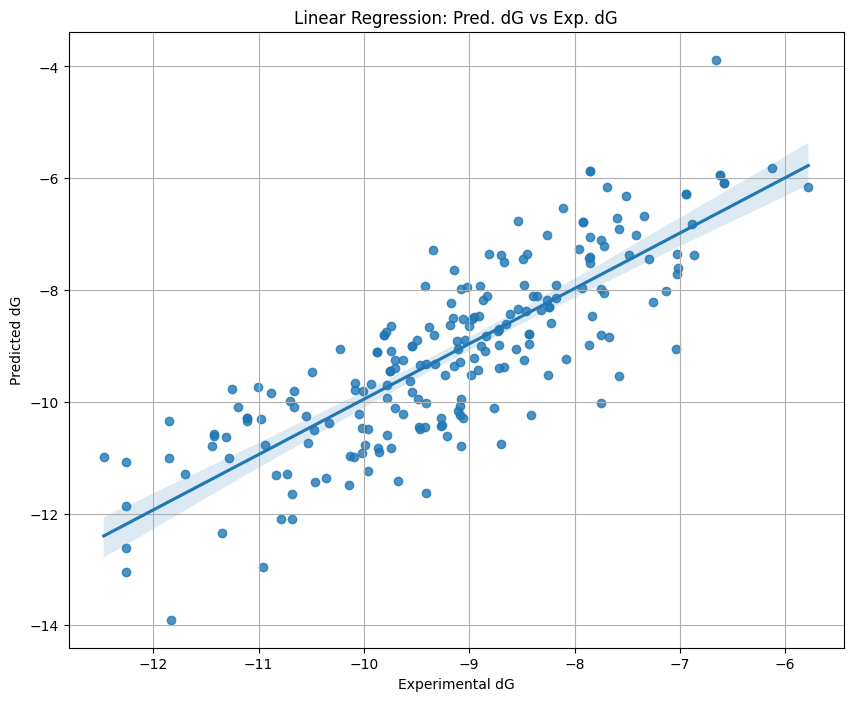

In [39]:
plt.figure(figsize=(10, 8))
sns.regplot(x='Exp. dG', y='Pred. dG', data=dataframe)
plt.title("Linear Regression: Pred. dG vs Exp. dG")
plt.xlabel("Experimental dG")
plt.ylabel("Predicted dG")
plt.grid(True)
plt.show()

## Evaluating The Regression between FEP and EXP


In [40]:
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import pearsonr

In [43]:
y_true = dataframe['Exp. dG']
y_pred = dataframe['Pred. dG']

rmse = np.sqrt(mean_squared_error(y_true, y_pred))
r_sqaure = r2_score(y_true, y_pred)
pearson_corr, p_value = pearsonr(y_true, y_pred)

In [69]:
regression_metrics  = pd.DataFrame({
    'Metric Type': [
        'Root Mean Squared Error (RMSE)',
        'R² Score',
        'Pearson Correlation Coefficient',
        'P-value of Pearson Coefficient'
    ],
    'Value': [
        rmse,
        r_sqaure,
        pearson_corr,
        p_value
    ]
})


In [70]:
regression_metrics

,Metric Type,Value
0,Root Mean Squared Error (RMSE),9.244386e-01
1,R² Score,5.167676e-01
2,Pearson Correlation Coefficient,8.187982e-01
3,P-value of Pearson Coefficient,2.835420e-52
